<a href="https://colab.research.google.com/github/rubymanderna/ML_ECGR5105/blob/main/Homework_4_ML/Homework_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1:

Use the cancer dataset to build an SVM classifier to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K).

1. Identify the optimum number of K, principal components that achieve the highest classification accuracy.

2. Plot your classification accuracy, precision, and recall over a different number of Ks.

3. Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.

4. Compare your results against the logistic regression that you have done in homework 3.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [9]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/ML_ECGR5105/cancer.csv")
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [10]:
#checking nan values
nan_counts = df.isna().sum()
#droping 'Unnamed: 32' since all values are null
df = df.drop(columns=['id', 'Unnamed: 32'])
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

The optimum number of K is 5 with an accuracy of 0.98246.


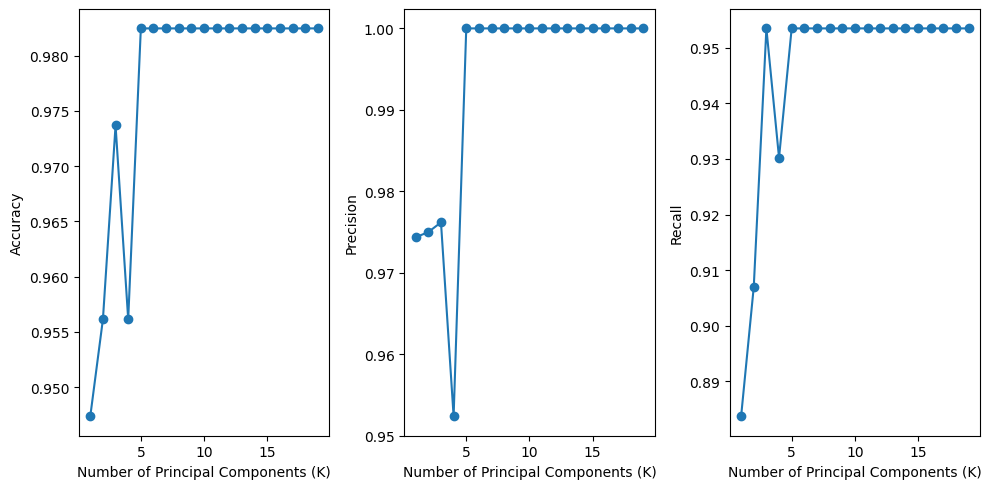

In [13]:


# Load and Preprocess the Data
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']


# Standardize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=X.shape[1])
X_pca = pca.fit_transform(X_scaled)

# Determine the optimal number of components (K)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)


# Support Vector Machine (SVM) Classifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Plot explained variance ratio to help choose K
K_values = range(1, 20)  # Assume we want to try K from 1 to 10

results = []

for K in K_values:
    # Select first K principal components
    X_pca_K = X_pca[:, :K]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_pca_K, y, test_size=0.2, random_state=42)

    # Train SVM classifier
    svm_classifier = SVC(kernel='linear')  # Experiment with different kernels
    svm_classifier.fit(X_train, y_train)

    # Predict on test set
    y_pred = svm_classifier.predict(X_test)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    results.append((K, accuracy, precision, recall))

# Find the index with the highest accuracy
optimal_idx = [item[1] for item in results].index(max([item[1] for item in results]))
optimal_K = results[optimal_idx][0]
optimal_accuracy = results[optimal_idx][1]

print(f"The optimum number of K is {optimal_K} with an accuracy of {optimal_accuracy:.5f}.")

# Analysis and Visualization
import matplotlib.pyplot as plt

K_values, accuracies, precisions, recalls = zip(*results)

# Plot accuracy, precision, and recall
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.plot(K_values, accuracies, marker='o')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 2)
plt.plot(K_values, precisions, marker='o')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Precision')

plt.subplot(1, 3, 3)
plt.plot(K_values, recalls, marker='o')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Recall')

plt.tight_layout()
plt.show()



Explore different kernel tricks

Best K values for each kernel:
Kernel 'linear': Best K = 5
Kernel 'poly': Best K = 3
Kernel 'rbf': Best K = 3
Kernel 'sigmoid': Best K = 4


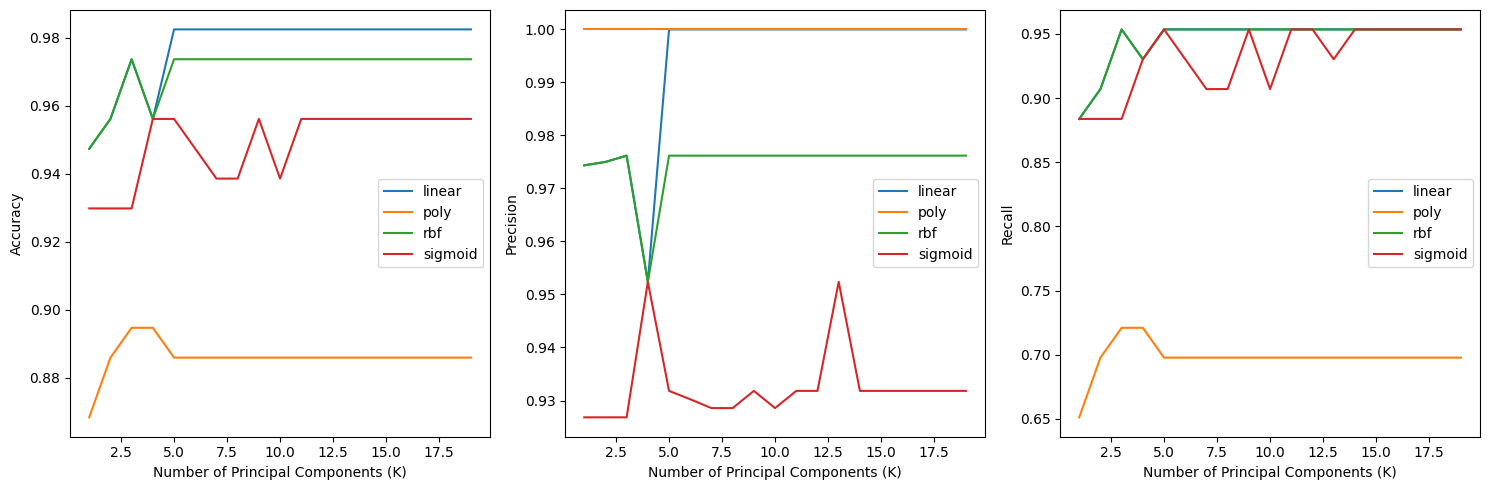

In [12]:

# Experiment with Different Kernels
kernel_types = ['linear', 'poly', 'rbf', 'sigmoid']  # Add more kernels as needed

results_per_kernel = {}

for kernel in kernel_types:
    kernel_results = []
    for K in K_values:
        # Select first K principal components
        X_pca_K = X_pca[:, :K]

        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_pca_K, y, test_size=0.2, random_state=42)

        # Train SVM classifier with the selected kernel
        svm_classifier = SVC(kernel=kernel)
        svm_classifier.fit(X_train, y_train)

        # Predict on test set
        y_pred = svm_classifier.predict(X_test)

        # Evaluate performance
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        kernel_results.append((K, accuracy, precision, recall))

    results_per_kernel[kernel] = kernel_results

# Find the best K for each kernel
best_K_per_kernel = {}
for kernel, kernel_results in results_per_kernel.items():
    optimal_idx = [item[1] for item in kernel_results].index(max([item[1] for item in kernel_results]))
    optimal_K = kernel_results[optimal_idx][0]
    best_K_per_kernel[kernel] = optimal_K

# Print best K for each kernel
print("Best K values for each kernel:")
for kernel, K in best_K_per_kernel.items():
    print(f"Kernel '{kernel}': Best K = {K}")

# Plot accuracy, precision, and recall for each kernel
plt.figure(figsize=(15, 5))

for i, metric in enumerate(['Accuracy', 'Precision', 'Recall']):
    plt.subplot(1, 3, i+1)
    for kernel, kernel_results in results_per_kernel.items():
        K_values, metric_values = zip(*[(item[0], item[i+1]) for item in kernel_results])
        plt.plot(K_values, metric_values, label=kernel)

    plt.xlabel('Number of Principal Components (K)')
    plt.ylabel(metric)
    plt.legend()

plt.tight_layout()
plt.show()
